In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the Data

In [2]:
pwd

'D:\\Credit-Risk-Project\\credit-risk-modelling\\notebooks'

In [3]:
# read the data

data_path = 'F:/My Drive/credit risk project/data/data.csv'

final_df = pd.read_csv(data_path)

final_df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


# Initial Analysis

In [4]:
# get the info of the data

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

**Overview**:
1. No null values in the data.
2. There are 6 categorical/text columns in the data.
   - Marital_Status
   - Education
   - Gender
   - Last_Product_Enq
   - First_Product_Enq
   - Approved Flag (Target)
4. Rest are all numerical columns.

In [5]:
# get the statistical summary of all the numerical columns

(
    final_df
    .select_dtypes(include='number')
    .drop(columns=final_df.columns[0])
    .describe()
    .to_csv('Data-statistical-Summary.csv')
)


In [6]:
# columns having missing values

(
    final_df
    .isna()
    .sum()
    .loc[lambda ser: ser.gt(0)]
)

Series([], dtype: int64)

In [7]:
# columns having negative values

(
    final_df
    .select_dtypes('number')
    .min()
    .loc[lambda ser: ser < 0]
)

Age_Oldest_TL                  -99999.0
Age_Newest_TL                  -99999.0
time_since_recent_payment      -99999.0
time_since_first_deliquency    -99999.0
time_since_recent_deliquency   -99999.0
max_delinquency_level          -99999.0
max_deliq_6mts                 -99999.0
max_deliq_12mts                -99999.0
tot_enq                        -99999.0
CC_enq                         -99999.0
CC_enq_L6m                     -99999.0
CC_enq_L12m                    -99999.0
PL_enq                         -99999.0
PL_enq_L6m                     -99999.0
PL_enq_L12m                    -99999.0
time_since_recent_enq          -99999.0
enq_L12m                       -99999.0
enq_L6m                        -99999.0
enq_L3m                        -99999.0
pct_currentBal_all_TL          -99999.0
CC_utilization                 -99999.0
PL_utilization                 -99999.0
max_unsec_exposure_inPct       -99999.0
dtype: float64

**The domain expert said that the missing or no info values in the data we replaced by `-99999`**

In [8]:
# get the missing value

missing_value = (
     final_df
    .select_dtypes('number')
    .min()
    .loc[lambda ser: ser < 0]
    .min()
)

missing_value

np.float64(-99999.0)

In [9]:
# missing value in the data after -99999 is replaced with nan

(
    final_df
    .replace(missing_value,np.nan)
    .isna()
    .mean()
    .loc[lambda ser: ser > 0]
    .mul(100)
    .sort_values(ascending=False)
)

CC_utilization                  92.792582
PL_utilization                  86.557192
time_since_first_deliquency     70.026882
time_since_recent_deliquency    70.026882
max_delinquency_level           70.026882
max_unsec_exposure_inPct        45.149603
max_deliq_6mts                  25.109085
max_deliq_12mts                 21.100203
PL_enq_L12m                     12.312997
enq_L3m                         12.312997
enq_L6m                         12.312997
enq_L12m                        12.312997
time_since_recent_enq           12.312997
CC_enq_L12m                     12.312997
PL_enq_L6m                      12.312997
PL_enq                          12.312997
CC_enq_L6m                      12.312997
CC_enq                          12.312997
tot_enq                         12.312997
time_since_recent_payment        8.358657
pct_currentBal_all_TL            0.140252
Age_Newest_TL                    0.077918
Age_Oldest_TL                    0.077918
dtype: float64

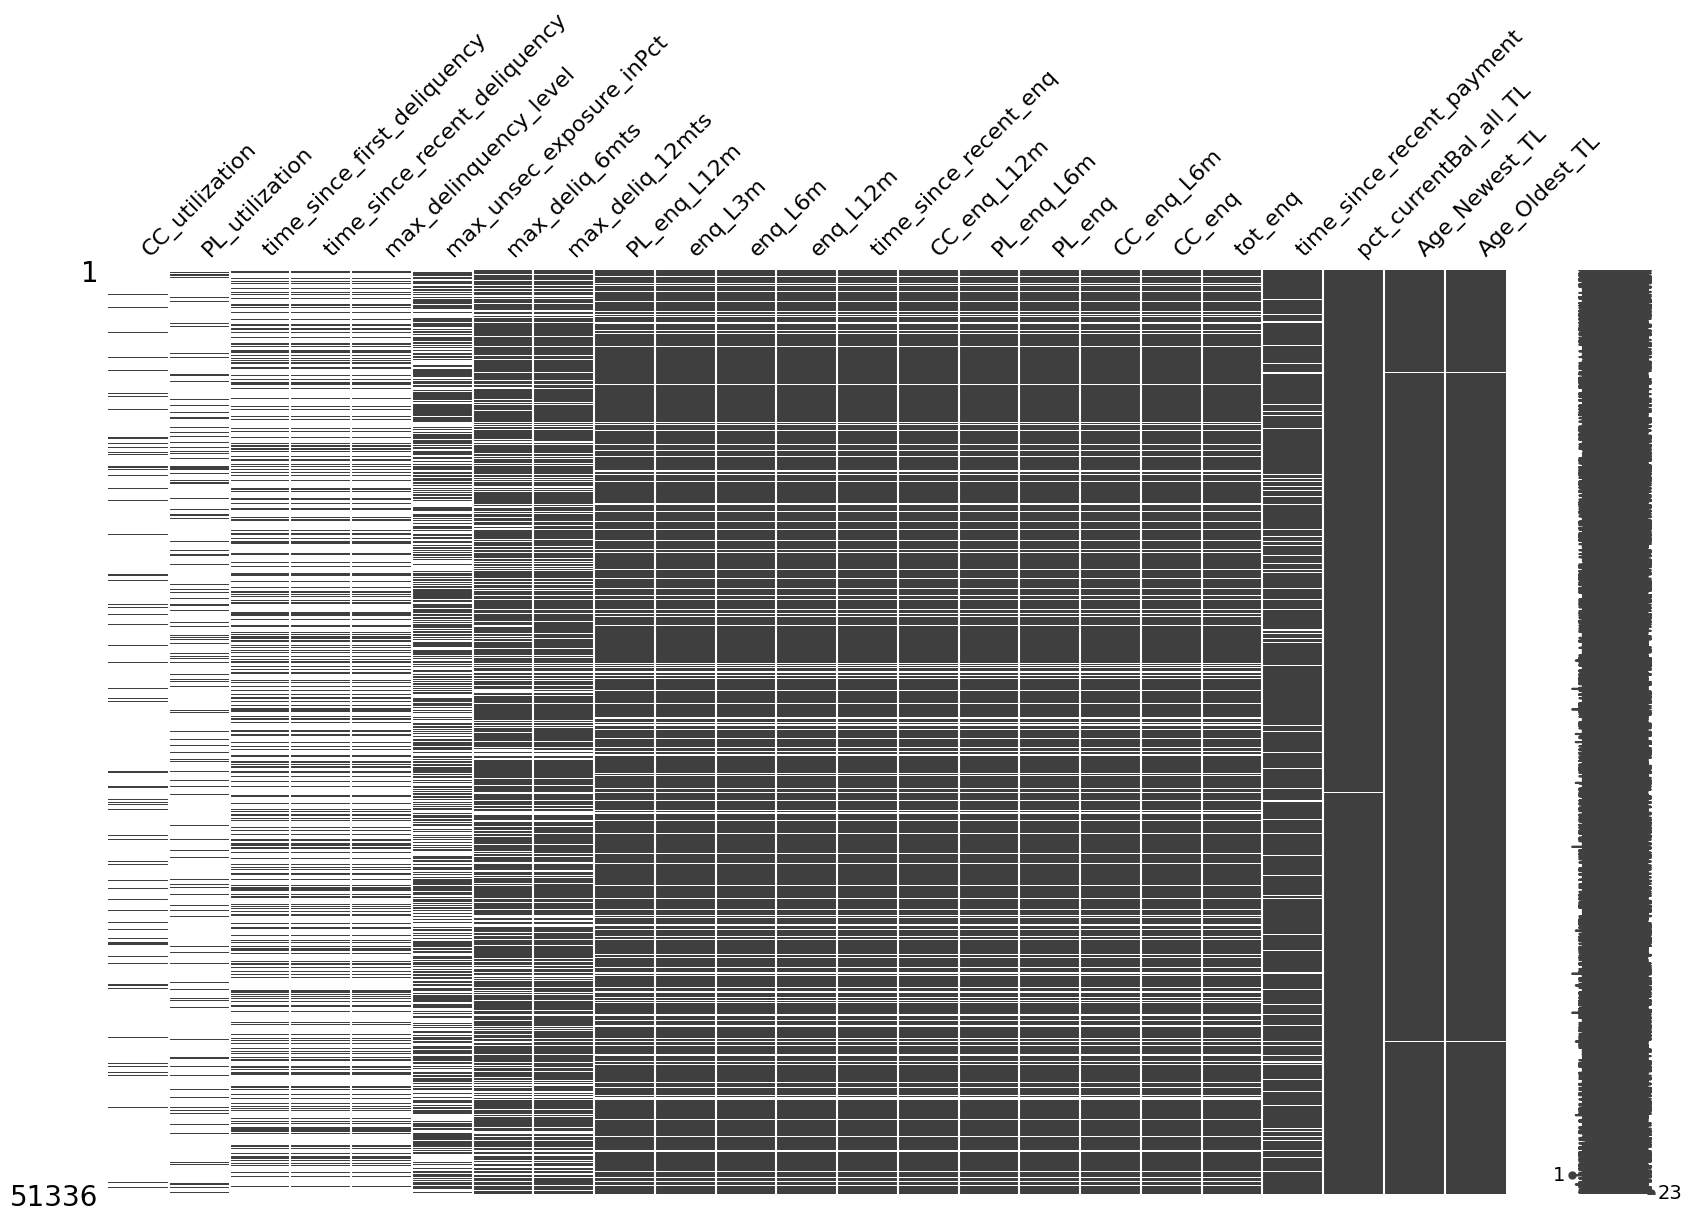

In [10]:
# plot the heatmap for the missing values

columns_having_missing_values = (
    final_df
    .replace(missing_value,np.nan)
    .isna()
    .mean()
    .loc[lambda ser: ser > 0]
    .mul(100)
    .sort_values(ascending=False)
    .index
    .tolist()
)

missingno.matrix(df=final_df.loc[:,columns_having_missing_values].replace(missing_value,np.nan),
                 figsize=(20,12));


plt.savefig('missingness.png')

In [11]:
# no. of columns having missing data


len(columns_having_missing_values)

23

In [12]:
# capture the missingness information and then remove the columns

def capture_missingness(df,column_names):
    return (
        df.assign(**{
            col : np.where(df.loc[:,col] == np.nan, 1 ,0)
            for col in column_names
        })
        .drop(columns=column_names)
    )


column_names = (
    final_df
    .replace(missing_value,np.nan)
    .isna()
    .mean()
    .mul(100)
    .loc[lambda ser : ser >= 50]
    .index
    .tolist()
)

In [65]:
final_df.isnull().mean().gt(0.5)

prospectid             False
total_tl               False
tot_closed_tl          False
tot_active_tl          False
total_tl_opened_l6m    False
                       ...  
gl_flag                False
last_prod_enq2         False
first_prod_enq2        False
credit_score           False
approved_flag          False
Length: 87, dtype: bool

In [13]:
# check the rows where the data is missing more than 50% out of all columns having missing data

(
    final_df
    .loc[:,columns_having_missing_values]
    .replace(missing_value,np.nan)
    .isna()
    .mean(axis=1)
    .mul(100)
    .loc[lambda ser : ser >= 50]
    .count()
)

np.int64(6321)

## Data Cleaning

In [14]:
def show_nan(df):
    return (
        df
        .rename(columns=str.lower)
        .replace(missing_value,np.nan)
    )

In [15]:
final_df = show_nan(final_df)

final_df

,prospectid,total_tl,tot_closed_tl,tot_active_tl,total_tl_opened_l6m,tot_tl_closed_l6m,pct_tl_open_l6m,pct_tl_closed_l6m,pct_active_tl,pct_closed_tl,...,pct_cc_enq_l6m_of_l12m,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,max_unsec_exposure_inpct,hl_flag,gl_flag,last_prod_enq2,first_prod_enq2,credit_score,approved_flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,NaN,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


<Axes: >

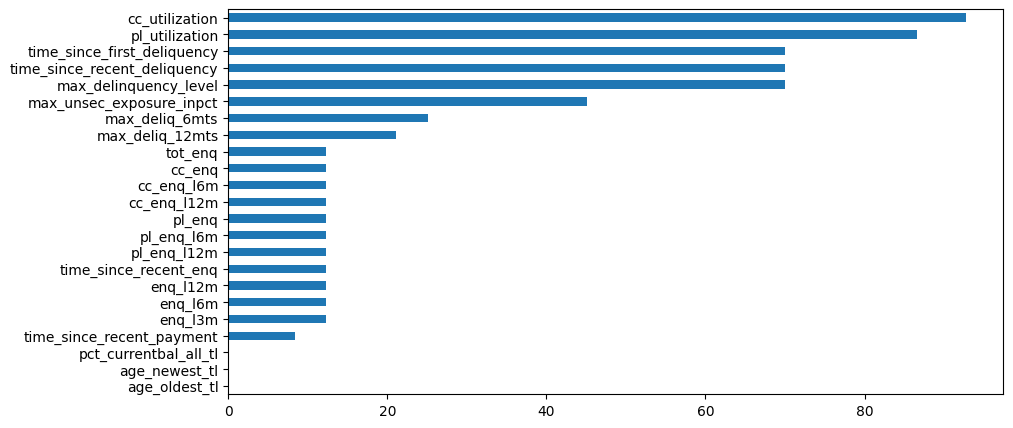

In [16]:
# check for missing values percentage in features

(
    final_df
    .isna()
    .mean()
    .mul(100)
    .loc[lambda ser: ser > 0]
    # .count()
    .sort_values(ascending=True)
    .plot(kind='barh',figsize=(10,5))
)

In [17]:
# calculate the min, max, median and mean of the columns that have missing values

(
    final_df
    .select_dtypes(include='number')
    .loc[:,lambda df: df.isna().any()]
    .agg(["min","max","median","mean"])
    .transpose()
)

,min,max,median,mean
age_oldest_tl,0.0,392.000,33.0000,45.376969
age_newest_tl,0.0,392.000,8.0000,15.780022
time_since_recent_payment,2.0,6065.000,74.0000,249.463599
time_since_first_deliquency,0.0,35.000,21.0000,20.318646
time_since_recent_deliquency,0.0,35.000,10.0000,12.696757
max_delinquency_level,1.0,900.000,33.0000,74.047573
max_deliq_6mts,0.0,900.000,0.0000,4.841128
max_deliq_12mts,0.0,900.000,0.0000,9.206498
tot_enq,1.0,176.000,3.0000,5.291036
cc_enq,0.0,42.000,0.0000,0.467266


In [18]:
# once again check the columns in the data

final_df.columns

Index(['prospectid', 'total_tl', 'tot_closed_tl', 'tot_active_tl',
       'total_tl_opened_l6m', 'tot_tl_closed_l6m', 'pct_tl_open_l6m',
       'pct_tl_closed_l6m', 'pct_active_tl', 'pct_closed_tl',
       'total_tl_opened_l12m', 'tot_tl_closed_l12m', 'pct_tl_open_l12m',
       'pct_tl_closed_l12m', 'tot_missed_pmnt', 'auto_tl', 'cc_tl',
       'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl',
       'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl',
       'time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'n

# Column Wise Data Cleaning

### Total_tl

In [19]:
# number of unique values in the column

(
    final_df
    .loc[:,'total_tl']
    .nunique()
)

107

In [20]:
# min and max values of the column
(
    final_df
    .loc[:,'total_tl']
    .agg(["min","max"])
)

min      1
max    235
Name: total_tl, dtype: int64

In [21]:
(
    final_df
    .loc[:,'total_tl']
    .value_counts()
    .loc[lambda ser: ser.le(5)]
    .count()
)

np.int64(47)

In [22]:
# relationship with target

(
    final_df
    .loc[:,['total_tl','approved_flag']]
    .groupby('approved_flag')
    .agg(["min","max","median","mean"])
)

total_tl                      
                   min  max median      mean
approved_flag                               
P1                   1  143    6.0  9.923316
P2                   1  123    2.0  4.060530
P3                   1  157    2.0  4.269055
P4                   1  235    3.0  4.977559

### Closed TL, Open TL

In [23]:
tl_subset = (
    final_df
    .iloc[:,1:4]
)

tl_subset

,total_tl,tot_closed_tl,tot_active_tl
0,5,4,1
1,1,0,1
2,8,0,8
3,1,0,1
4,3,2,1
...,...,...,...
51331,3,0,3
51332,4,2,2
51333,2,1,1
51334,2,1,1


In [24]:
tl_subset.corr()

,total_tl,tot_closed_tl,tot_active_tl
total_tl,1.000000,0.956367,0.652481
tot_closed_tl,0.956367,1.000000,0.402606
tot_active_tl,0.652481,0.402606,1.000000


### Opened TL columns

In [25]:
# all the opened tl columns

(
    final_df
    .filter(like="open")
)

,total_tl_opened_l6m,pct_tl_open_l6m,total_tl_opened_l12m,pct_tl_open_l12m,pct_opened_tls_l6m_of_l12m
0,0,0.000,0,0.000,0.0
1,0,0.000,1,1.000,0.0
2,1,0.125,2,0.250,0.5
3,1,1.000,1,1.000,1.0
4,0,0.000,0,0.000,0.0
...,...,...,...,...,...
51331,1,0.333,1,0.333,1.0
51332,0,0.000,2,0.500,0.0
51333,1,0.500,2,1.000,0.5
51334,0,0.000,1,0.500,0.0


### Active TL columns

In [26]:
# all the active Tl columns
(
    final_df
    .filter(like="active")
)

,tot_active_tl,pct_active_tl,pct_of_active_tls_ever
0,1,0.200,0.200
1,1,1.000,1.000
2,8,1.000,1.000
3,1,1.000,1.000
4,1,0.333,0.333
...,...,...,...
51331,3,1.000,1.000
51332,2,0.500,0.500
51333,1,0.500,0.500
51334,1,0.500,0.500


### Closed TL columns

In [27]:
# all the closed Tl columns
(
    final_df
    .filter(like="close")
)

,tot_closed_tl,tot_tl_closed_l6m,pct_tl_closed_l6m,pct_closed_tl,tot_tl_closed_l12m,pct_tl_closed_l12m
0,4,0,0.00,0.800,0,0.00
1,0,0,0.00,0.000,0,0.00
2,0,0,0.00,0.000,0,0.00
3,0,0,0.00,0.000,0,0.00
4,2,0,0.00,0.667,0,0.00
...,...,...,...,...,...,...
51331,0,0,0.00,0.000,0,0.00
51332,2,1,0.25,0.500,1,0.25
51333,1,1,0.50,0.500,1,0.50
51334,1,0,0.00,0.500,1,0.50


In [28]:
# calculate the vif for the percentage columns
variance_inflation_factor(
                            final_df
                            .loc[:,['total_tl','tot_closed_tl','pct_closed_tl']],
                            0
                        )

np.float64(11.601159692569455)

In [29]:
# columns in the data
final_df.columns


Index(['prospectid', 'total_tl', 'tot_closed_tl', 'tot_active_tl',
       'total_tl_opened_l6m', 'tot_tl_closed_l6m', 'pct_tl_open_l6m',
       'pct_tl_closed_l6m', 'pct_active_tl', 'pct_closed_tl',
       'total_tl_opened_l12m', 'tot_tl_closed_l12m', 'pct_tl_open_l12m',
       'pct_tl_closed_l12m', 'tot_missed_pmnt', 'auto_tl', 'cc_tl',
       'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl',
       'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl',
       'time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'n

### Types of TL

In [30]:
tl_types_df = (
                final_df
                .filter(regex=r"^[a-z]*_{1}tl$")
                .drop(columns='total_tl')
                )

tl_types_df

,auto_tl,cc_tl,consumer_tl,gold_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl
0,0,0,0,1,0,4,1,4,0
1,0,0,1,0,0,0,0,1,0
2,1,0,6,1,0,0,2,6,0
3,0,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,3,0,2
...,...,...,...,...,...,...,...,...,...
51331,0,0,2,0,0,0,0,3,1
51332,2,0,2,0,0,0,2,2,0
51333,0,0,2,0,0,0,0,2,0
51334,0,0,2,0,0,0,0,2,0


In [31]:
vif = []
for i in range(0,9):
    vif.append(variance_inflation_factor(tl_types_df,i))

pd.DataFrame(vif,index=tl_types_df.columns,columns=['vif'])

D:\Credit-Risk-Project\credit-risk-modelling\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif
auto_tl,inf
cc_tl,inf
consumer_tl,inf
gold_tl,inf
home_tl,inf
pl_tl,inf
secured_tl,inf
unsecured_tl,inf
other_tl,inf


In [32]:
def is_present(df):
    columns_list = df.columns.to_list()
    return(
        df
        .assign(**{
            col: df.loc[:,col].gt(0).astype(int)
            for col in columns_list
        })
    )

In [66]:
is_present(tl_types_df)

,auto_tl,cc_tl,consumer_tl,gold_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl
0,0,0,0,1,0,1,1,1,0
1,0,0,1,0,0,0,0,1,0
2,1,0,1,1,0,0,1,1,0
3,0,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
51331,0,0,1,0,0,0,0,1,1
51332,1,0,1,0,0,0,1,1,0
51333,0,0,1,0,0,0,0,1,0
51334,0,0,1,0,0,0,0,1,0


In [33]:
vif = []
for i in range(0,9):
    vif.append(variance_inflation_factor(is_present(tl_types_df),i))

pd.DataFrame(vif,index=tl_types_df.columns,columns=['vif'])

,vif
auto_tl,3.100854
cc_tl,1.215809
consumer_tl,3.654203
gold_tl,1.871820
home_tl,1.117554
pl_tl,1.407796
secured_tl,5.706023
unsecured_tl,5.701299
other_tl,2.144836


In [34]:
print(tl_types_df.columns.to_list())

['auto_tl', 'cc_tl', 'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl']


### Age columns

In [35]:
final_df.columns

Index(['prospectid', 'total_tl', 'tot_closed_tl', 'tot_active_tl',
       'total_tl_opened_l6m', 'tot_tl_closed_l6m', 'pct_tl_open_l6m',
       'pct_tl_closed_l6m', 'pct_active_tl', 'pct_closed_tl',
       'total_tl_opened_l12m', 'tot_tl_closed_l12m', 'pct_tl_open_l12m',
       'pct_tl_closed_l12m', 'tot_missed_pmnt', 'auto_tl', 'cc_tl',
       'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl',
       'unsecured_tl', 'other_tl', 'age_oldest_tl', 'age_newest_tl',
       'time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'n

In [36]:
age_tl_subset = (
                final_df
                .filter(regex="age_")
            )

age_tl_subset

,age_oldest_tl,age_newest_tl
0,72.0,18.0
1,7.0,7.0
2,47.0,2.0
3,5.0,5.0
4,131.0,32.0
...,...,...
51331,24.0,5.0
51332,74.0,7.0
51333,9.0,5.0
51334,15.0,8.0


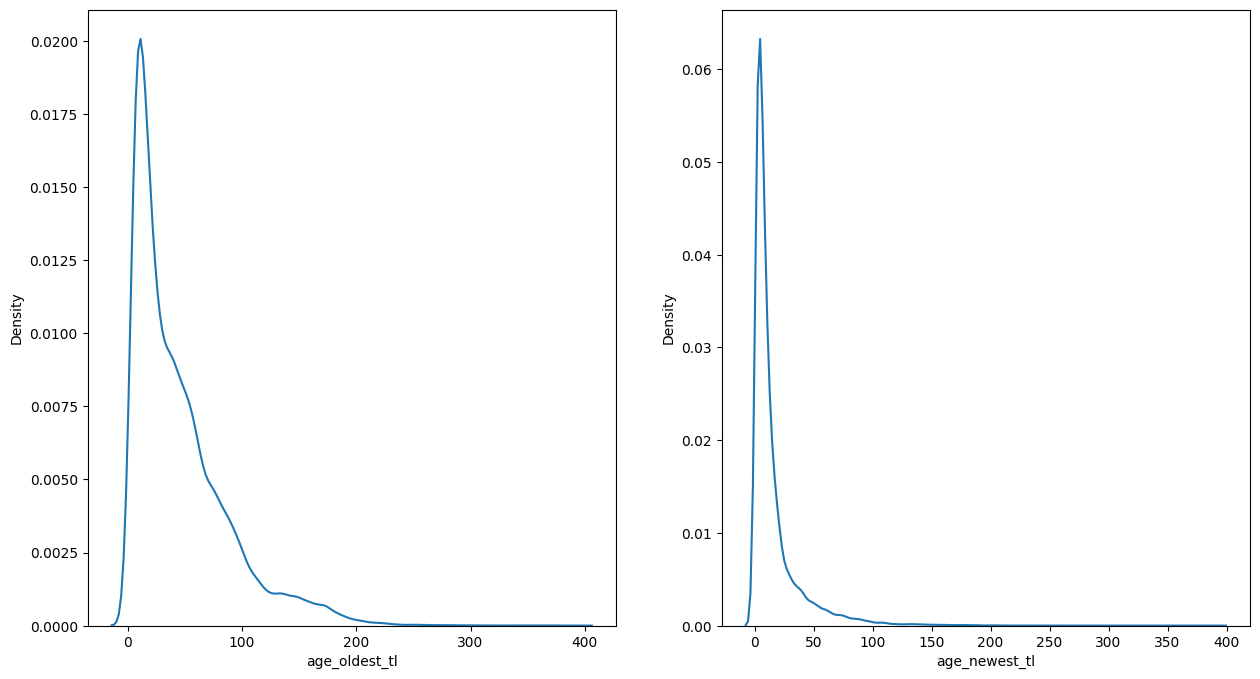

In [37]:
# density plots

plt.figure(figsize=(15,8))

for ind,col in enumerate(age_tl_subset.columns):
    plt.subplot(1,2,ind+1)
    sns.kdeplot(data=age_tl_subset,x=col);

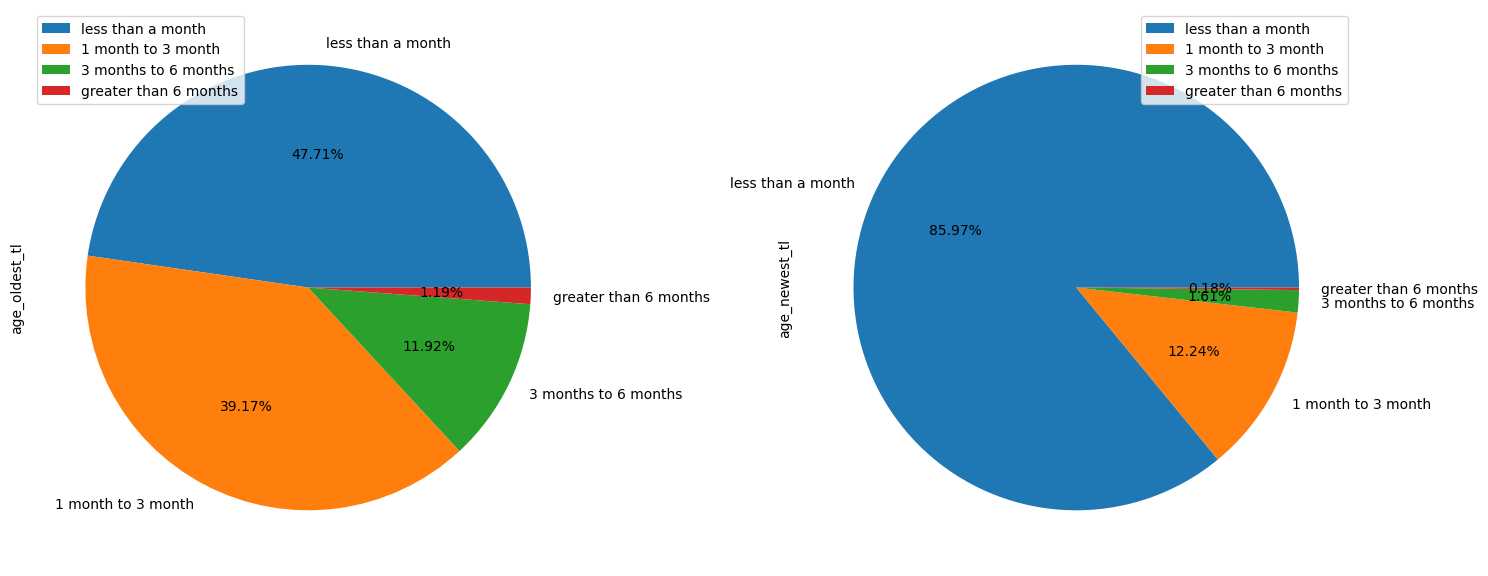

In [38]:
# value counts

def age_val_counts(df):
    columns_list = df.columns.to_list()
    temp_df = (
        df
        .assign(**{
            col:(
                np.select(condlist=[df.loc[:,col].le(30),
                                   df.loc[:,col].between(30,90,inclusive="right"),
                                   df.loc[:,col].between(90,180,inclusive="right")],
                         choicelist=['less than a month','1 month to 3 month','3 months to 6 months'],
                         default='greater than 6 months')
            )
            for col in columns_list
        })
    )
    dfs = []
    for col in columns_list:
        dfs.append(temp_df.loc[:,col].value_counts())
    return pd.concat(dfs,axis=1).set_axis(['age_oldest_tl','age_newest_tl'],axis=1)


age_val_counts(age_tl_subset).plot(kind='pie',subplots=True,figsize=(15,10),autopct="%0.2f%%")
plt.tight_layout()

**These Age columns can be discretized in the feature eng step to extract useful information out of the features**

### Time Since Delinquency Columns

<Axes: >

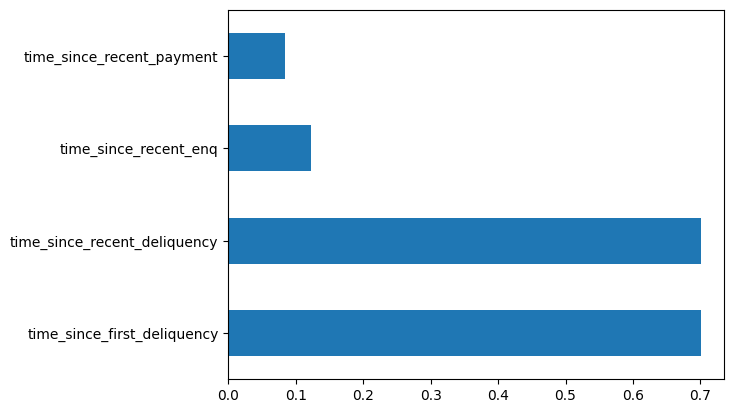

In [39]:
# check for missing values

(
    final_df
    .filter(like="time_since")
    .isna()
    .mean()
    .sort_values(ascending=False)
    .plot(kind='barh')
)

**There are about 70% missing values in the columns `time_since_first_delinquency` and `time_since_recent_delinquency`**

**It is better not to impute these large amount of missing values, but to capture their missingness using the `MissingIndicator`technique**

In [40]:
# time since recent payment relation with target

(
    final_df
    .loc[:,["time_since_recent_payment","approved_flag"]]
    .dropna()
    .groupby("approved_flag")
    .agg(["min","max","median","mean"])
)

time_since_recent_payment                           
                                    min     max median        mean
approved_flag                                                     
P1                                  2.0  6065.0   77.0  321.989591
P2                                  3.0  5827.0   76.0  261.551334
P3                                  4.0  5047.0   72.0  194.784123
P4                                  4.0  3950.0   68.0  176.738954

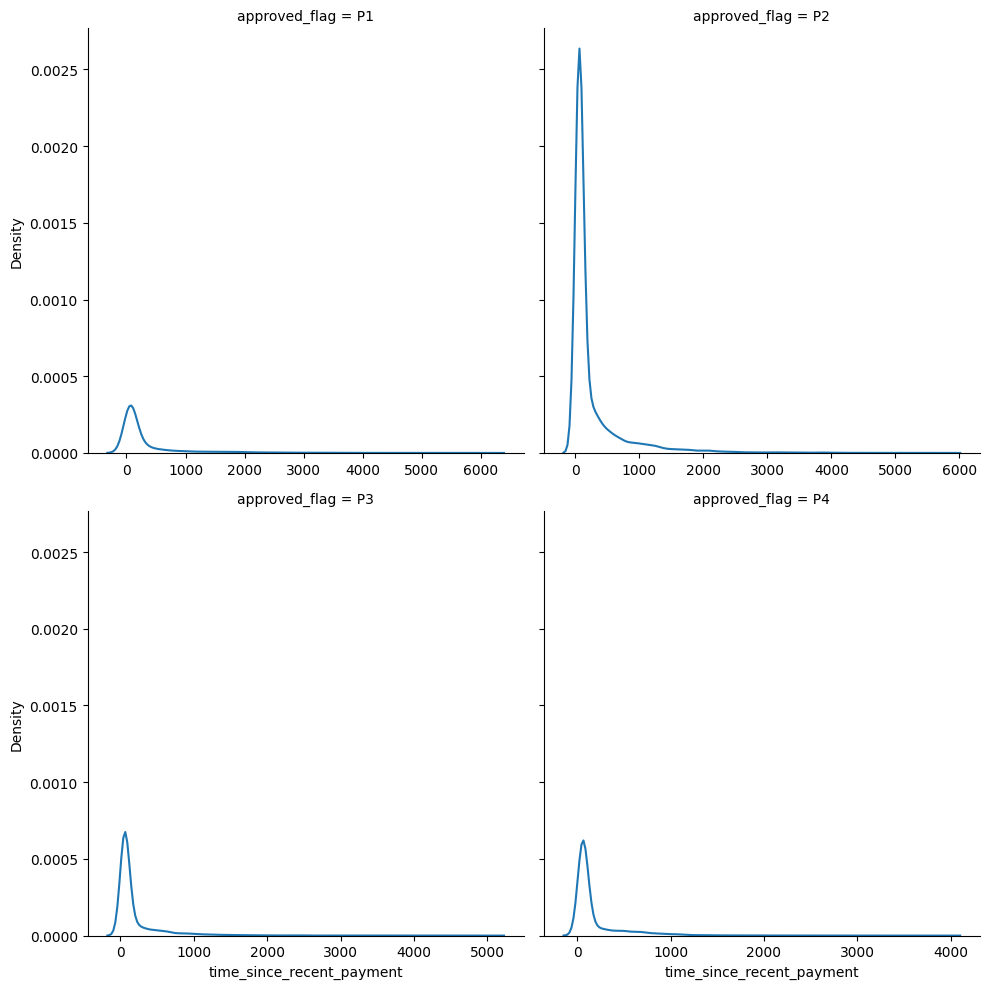

In [41]:
# density plot for the column

sns.displot(data=final_df,x='time_since_recent_payment',kind='kde',col_wrap=2,
            col='approved_flag',col_order=[f'P{i}' for i in range(1,5)],facet_kws={'sharex': False});

**The feature has highly right skewed data**

**Observations**
- Majority of the obervations are in very restrictive time limits, whereas some values are very extreme.
- Based on the plots it seems that this feature is not strongly associated with the target.
- The values are all over the place and it is very difficult to find outliers here, because of the distribution of the feature.

<Axes: ylabel='time_since_recent_payment'>

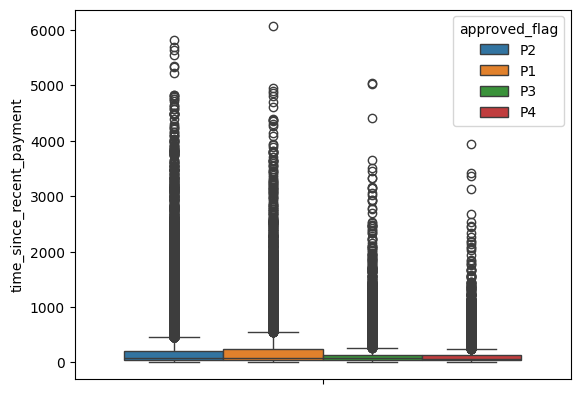

In [42]:
# boxplots

sns.boxplot(data=final_df, y='time_since_recent_payment', hue='approved_flag')

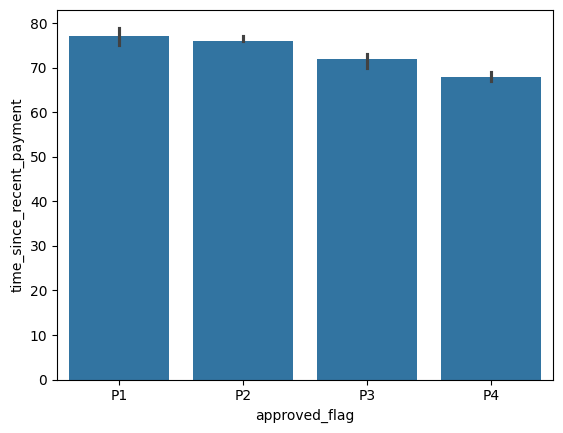

In [43]:
# bar plot of median payment time

sns.barplot(data=final_df,y='time_since_recent_payment',
            x='approved_flag',estimator='median',
           order=[f"P{i}" for i in range(1,5)]);

In [44]:
(
    final_df
    .filter(like="time_since")
)

,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,time_since_recent_enq
0,549.0,35.0,15.0,566.0
1,47.0,NaN,NaN,209.0
2,302.0,11.0,3.0,587.0
3,NaN,NaN,NaN,NaN
4,583.0,NaN,NaN,3951.0
...,...,...,...,...
51331,15.0,24.0,23.0,0.0
51332,57.0,NaN,NaN,203.0
51333,32.0,NaN,NaN,1.0
51334,58.0,NaN,NaN,242.0


In [45]:
# Time since recent enquiry

(
    final_df
    .loc[:,["time_since_recent_enq","approved_flag"]]
    .dropna()
    .groupby("approved_flag")
    .agg(["min","max","median","mean"])
)

time_since_recent_enq                           
                                min     max median        mean
approved_flag                                                 
P1                              0.0  4768.0  283.0  628.896717
P2                              0.0  3490.0  129.0  274.383519
P3                              0.0  3107.0   21.0  123.014013
P4                              0.0  2129.0    8.0   38.998777

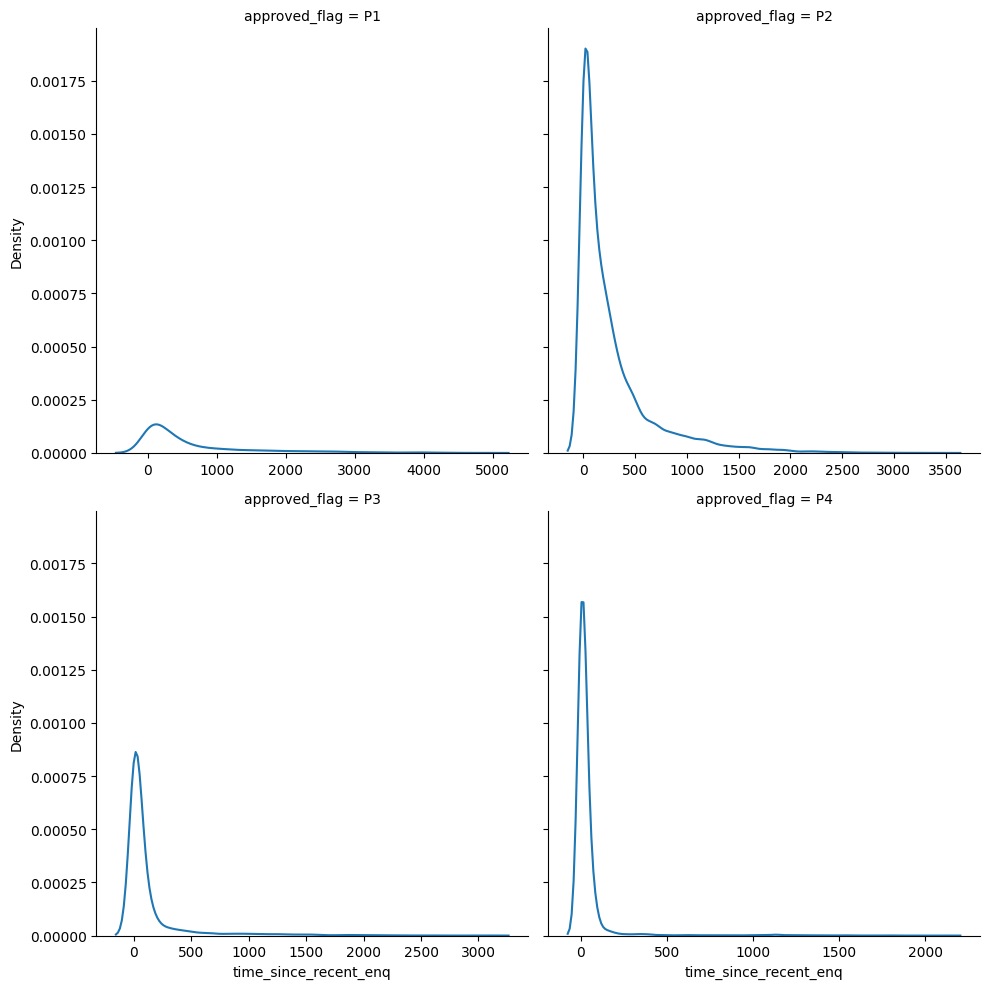

In [46]:
# density plot for the column

sns.displot(data=final_df,x='time_since_recent_enq',kind='kde',col_wrap=2,
            col='approved_flag',col_order=[f'P{i}' for i in range(1,5)],facet_kws={'sharex': False});

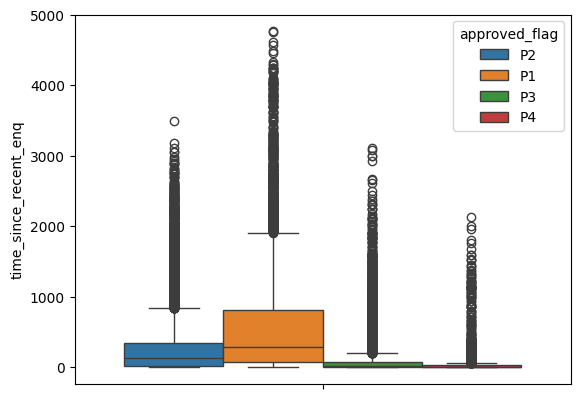

In [47]:
# boxplots

sns.boxplot(data=final_df, y='time_since_recent_enq', hue='approved_flag');

**The distribution of the feature changes with the category of the target variable(Seems to be an important feature)**

**Observations**:
1. We can clearly see that the customers with flags `P1` and `P2` have last enquiry times on the higher side as compared to the customers with flags `P3` and `P4`.
2. This pattern shows that customers who have a higher probability of defaulting on their credits are those who frequently enquire for more and more credits, so as to payoff the previous ones.

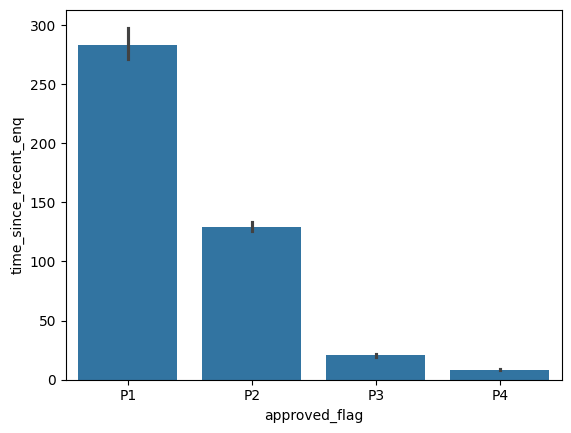

In [48]:
# bar plot of median last enq times

sns.barplot(data=final_df,y='time_since_recent_enq',
            x='approved_flag',estimator='median',
           order=[f"P{i}" for i in range(1,5)]);

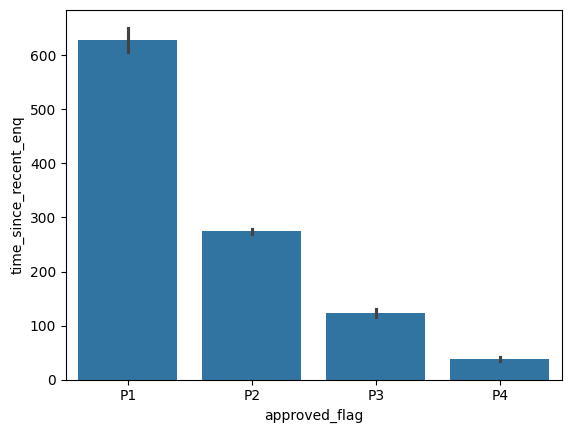

In [49]:
# bar plot of mean lat enq times
sns.barplot(data=final_df,y='time_since_recent_enq',
            x='approved_flag',estimator='mean',
           order=[f"P{i}" for i in range(1,5)]);

In [50]:
# printing the df columns again

(
    final_df
    .columns
    .tolist()[28:]
)

['time_since_recent_deliquency',
 'num_times_delinquent',
 'max_delinquency_level',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'cc_enq',
 'cc_enq_l6m',
 'cc_enq_l12m',
 'pl_enq',
 'pl_enq_l6m',
 'pl_enq_l12m',
 'time_since_recent_enq',
 'enq_l12m',
 'enq_l6m',
 'enq_l3m',
 'maritalstatus',
 'education',
 'age',
 'gender',
 'netmonthlyincome',
 'time_with_curr_empr',
 'pct_of_active_tls_ever',
 'pct_opened_tls_l6m_of_l12m',
 'pct_currentbal_all_tl',
 'cc_utilization',
 'cc_flag',
 'pl_utilization',
 'pl_flag',
 'pct_pl_enq_l6m_of_l12m',
 'pct_cc_enq_l6m_of_l12m',
 'pct_pl_enq_l6m_of_ever',
 'pct_cc_enq_l6m_of_ever',
 'max_unsec_exposur

### Number of Times Delinquint

In [51]:
num_delinq_subset = (
                    final_df
                    .filter(regex="num.*?_deli")
                   )

num_delinq_subset

,num_times_delinquent,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts
0,11,0,0,0
1,0,0,0,0
2,9,1,9,8
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
51331,2,0,0,0
51332,0,0,0,0
51333,0,0,0,0
51334,0,0,0,0


In [52]:
### check for missing values

(
    final_df
    .filter(regex="num.*?_deli")
    .isna()
    .sum()
)


num_times_delinquent    0
num_deliq_6mts          0
num_deliq_12mts         0
num_deliq_6_12mts       0
dtype: int64

In [53]:
(
    final_df
    .filter(regex="num.*?_deli")
    .describe()
)

,num_times_delinquent,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts
count,51336.000000,51336.000000,51336.000000,51336.000000
mean,1.573749,0.184977,0.480053,0.295076
std,4.165012,0.710240,1.522210,1.027471
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,74.000000,12.000000,28.000000,20.000000


In [54]:
variance_inflation_factor(
    (
    final_df
    .filter(regex="num.*?_deli")), 1
)

D:\Credit-Risk-Project\credit-risk-modelling\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


np.float64(inf)

In [55]:
def weighted_num_delinq(df):
    return (
        df
        .assign(
            num_delinq_weights = (df.loc[:,'num_deliq_6mts'] * 0.5) + (df.loc[:,"num_deliq_6_12mts"] * 0.3) + (df.loc[:,"num_deliq_12mts"] * 0.2) 
        )
        .drop(columns=["num_deliq_6mts","num_deliq_12mts","num_deliq_6_12mts"])
    )

weighted_num_delinq(num_delinq_subset)

,num_times_delinquent,num_delinq_weights
0,11,0.0
1,0,0.0
2,9,4.7
3,0,0.0
4,0,0.0
...,...,...
51331,2,0.0
51332,0,0.0
51333,0,0.0
51334,0,0.0


### Delinquency level

In [56]:
(
    final_df
    .filter(regex='max.*deli')
)

,max_delinquency_level,max_recent_level_of_deliq,max_deliq_6mts,max_deliq_12mts
0,29.0,29,NaN,NaN
1,NaN,0,0.0,0.0
2,25.0,25,25.0,25.0
3,NaN,0,NaN,NaN
4,NaN,0,NaN,NaN
...,...,...,...,...
51331,24.0,24,0.0,0.0
51332,NaN,0,0.0,0.0
51333,NaN,0,0.0,0.0
51334,NaN,0,0.0,0.0


In [57]:
# check for missing values
(
    final_df
    .filter(regex='max.+deli')
    .isna()
    .mean()
    .mul(100)
)

max_delinquency_level        70.026882
max_recent_level_of_deliq     0.000000
max_deliq_6mts               25.109085
max_deliq_12mts              21.100203
dtype: float64

**The column `max_delinquency_level` has a very high number of missing values, can be imputed using the `MissingIndicator` technique that catches the missingness in data**

In [58]:
### max_recent_level_of_deliq 

(
    final_df
    .loc[:,'max_recent_level_of_deliq']
    .agg(["min","max","median","mean"])
)

min         0.000000
max       900.000000
median      0.000000
mean       13.521953
Name: max_recent_level_of_deliq, dtype: float64

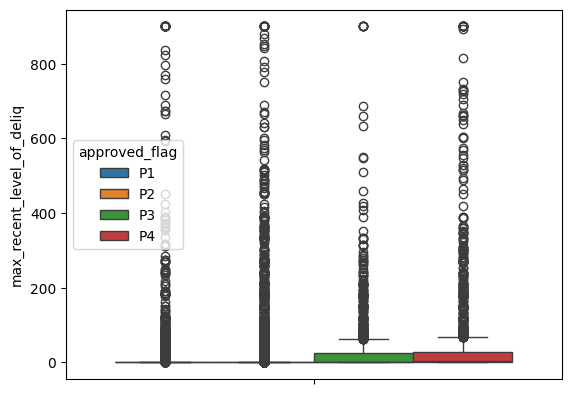

In [59]:
# boxplot for this column

sns.boxplot(data=final_df,y='max_recent_level_of_deliq',
            hue='approved_flag',hue_order=[f"P{i}" for i in range(1,5)]);

# Data Cleaning

In [60]:
# columns containing almost all missing values

(
    final_df
    .isna()
    .mean()
    .mul(100)
    .nlargest(2)
    .index
    .tolist()
)

['cc_utilization', 'pl_utilization']

In [61]:
def clean_data(df):
    return (
        df
        .drop(columns=["prospectid","total_tl","cc_utilization","pl_utilization"])
        .assign(**{
            f'is_{col}': lambda df_ : df_.loc[:,col].gt(0).astype(int)
            for col in ['auto_tl', 'cc_tl', 'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl']})
        .drop(columns=['auto_tl', 'cc_tl', 'consumer_tl', 'gold_tl', 'home_tl', 'pl_tl', 'secured_tl', 'unsecured_tl', 'other_tl'])
        .assign(
            num_delinq_weights = lambda df_ : (df_.loc[:,'num_deliq_6mts'] * 0.5) + (df_.loc[:,"num_deliq_6_12mts"] * 0.3) + (df_.loc[:,"num_deliq_12mts"] * 0.2) 
        )
        .drop(columns=["num_deliq_6mts","num_deliq_12mts","num_deliq_6_12mts"])
)

In [62]:
clean_data(final_df)

,tot_closed_tl,tot_active_tl,total_tl_opened_l6m,tot_tl_closed_l6m,pct_tl_open_l6m,pct_tl_closed_l6m,pct_active_tl,pct_closed_tl,total_tl_opened_l12m,tot_tl_closed_l12m,...,is_auto_tl,is_cc_tl,is_consumer_tl,is_gold_tl,is_home_tl,is_pl_tl,is_secured_tl,is_unsecured_tl,is_other_tl,num_delinq_weights
0,4,1,0,0,0.000,0.00,0.200,0.800,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,1,0,0,0.000,0.00,1.000,0.000,1,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,8,1,0,0.125,0.00,1.000,0.000,2,0,...,0,0,0,0,0,0,0,0,0,4.7
3,0,1,1,0,1.000,0.00,1.000,0.000,1,0,...,1,1,1,1,1,1,1,1,1,0.0
4,2,1,0,0,0.000,0.00,0.333,0.667,0,0,...,1,1,1,1,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,0,3,1,0,0.333,0.00,1.000,0.000,1,0,...,1,1,1,1,1,1,1,1,1,0.0
51332,2,2,0,1,0.000,0.25,0.500,0.500,2,1,...,0,0,0,0,0,0,0,0,0,0.0
51333,1,1,1,1,0.500,0.50,0.500,0.500,2,1,...,0,0,0,0,0,0,0,0,0,0.0
51334,1,1,0,0,0.000,0.00,0.500,0.500,1,1,...,0,0,0,0,0,0,0,0,0,0.0
